In [1]:
import os
from pydub import AudioSegment
import speech_recognition as sr

In [2]:
def get_text_from_audio(file_path):
    recognizer = sr.Recognizer()

    with sr.AudioFile(file_path) as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_google(audio_data, language="ru-RU")

    return text

In [3]:
def split_audio_by_words(input_folder, output_folder, max_files=None):
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)

                # Загрузка аудиофайла
                audio = AudioSegment.from_wav(file_path)

                # Извлечение текста из аудио
                full_text = get_text_from_audio(file_path)

                # Создание папки для результатов
                for word in full_text.split():
                    result_folder = os.path.join(output_folder, word)
                    os.makedirs(result_folder, exist_ok=True)

                    # Ограничение до max_files файлов, если указано
                    for i, (word_start, word_end) in enumerate(find_word_boundaries(audio, word)[:max_files]):
                        audio_part = audio[word_start:word_end]
                        txt_file = os.path.join(result_folder, f"{word}.txt")
                        wav_file = os.path.join(result_folder, f"{word}.wav")

                        # Сохранение текста в файл
                        with open(txt_file, 'w') as txt:
                            txt.write(full_text)

                        # Сохранение аудиофайла
                        audio_part.export(wav_file, format="wav")

In [4]:
def find_word_boundaries(audio, word):
    word_start = 0
    word_end = 0
    boundaries = []

    for i, chunk in enumerate(audio):
        if i == len(audio) - 1:
            boundaries.append((word_start, word_end))
            break

        # Проверка перехода между словами
        if chunk.dBFS < -40:
            if word_start != word_end:
                boundaries.append((word_start, word_end))
            word_start = i + 1
            word_end = i + 1
        else:
            word_end += 1

    return boundaries

In [5]:
# Замените пути к папкам на ваши
input_folder = "/home/redalexdad/recognition_speech/new_buriy_audiobooks_2_val"
output_folder = "/home/redalexdad/recognition_speech/voice_split"

In [6]:
split_audio_by_words(input_folder, output_folder, max_files=10)

UnknownValueError: 

In [11]:
from IPython import display
import librosa
import matplotlib.pyplot as plt
import numpy as np

Label ещё
Audio shape: (96,)
Waveform shape: (96,)
Audio playback


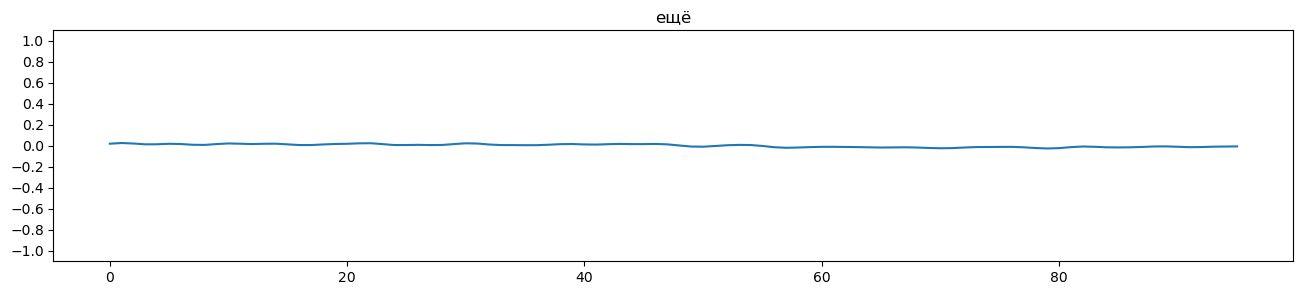

Label воротам
Audio shape: (32,)
Waveform shape: (32,)
Audio playback


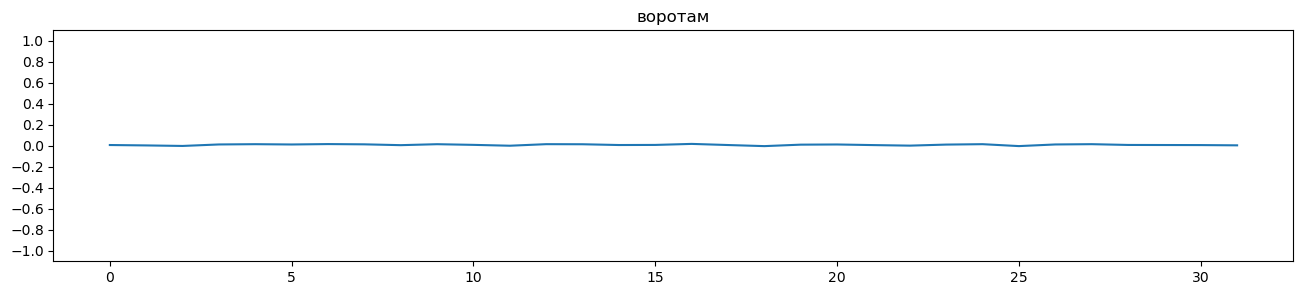

Label мятежникам
Audio shape: (64,)
Waveform shape: (64,)
Audio playback


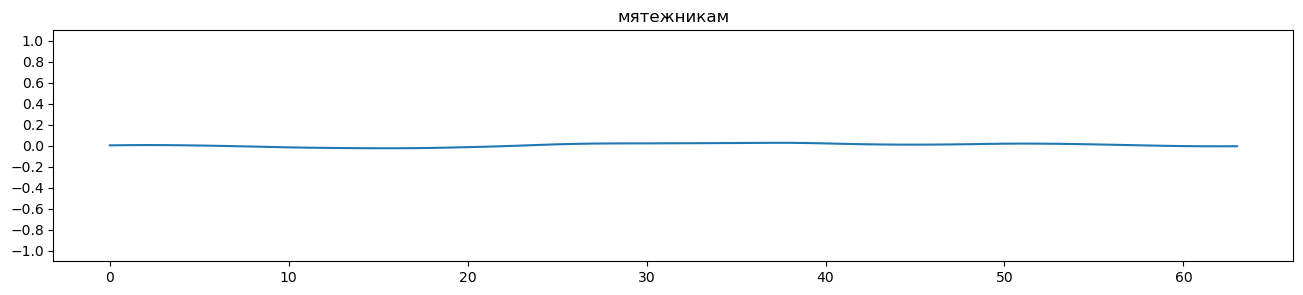

Label чтобы
Audio shape: (16,)
Waveform shape: (16,)
Audio playback


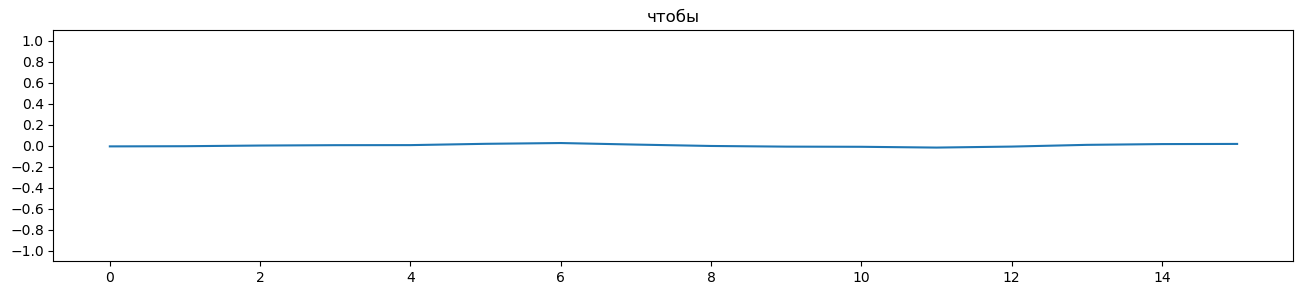

Label вечерним
Audio shape: (192,)
Waveform shape: (192,)
Audio playback


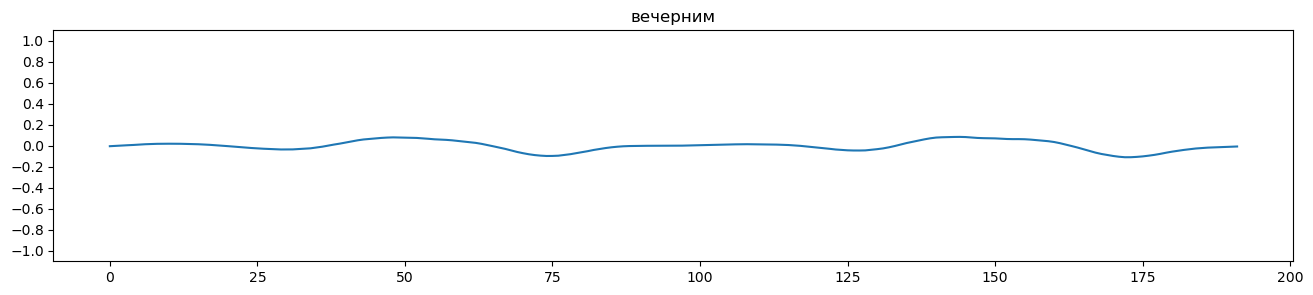

Label у
Audio shape: (32,)
Waveform shape: (32,)
Audio playback


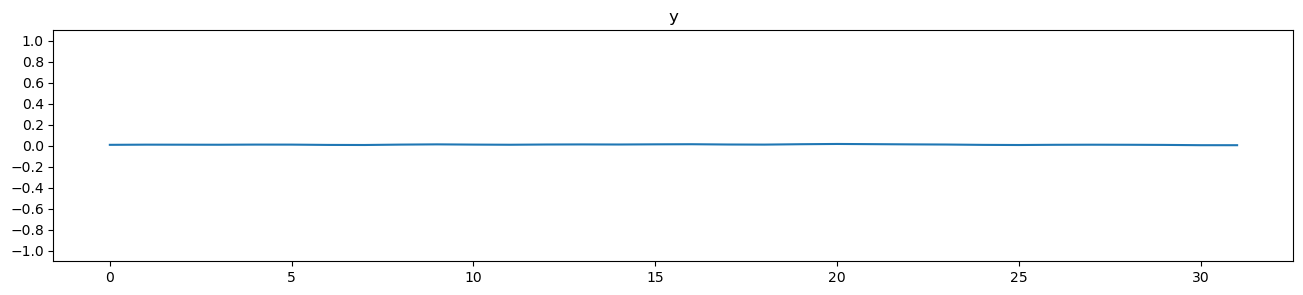

Label туфли
Audio shape: (16,)
Waveform shape: (16,)
Audio playback


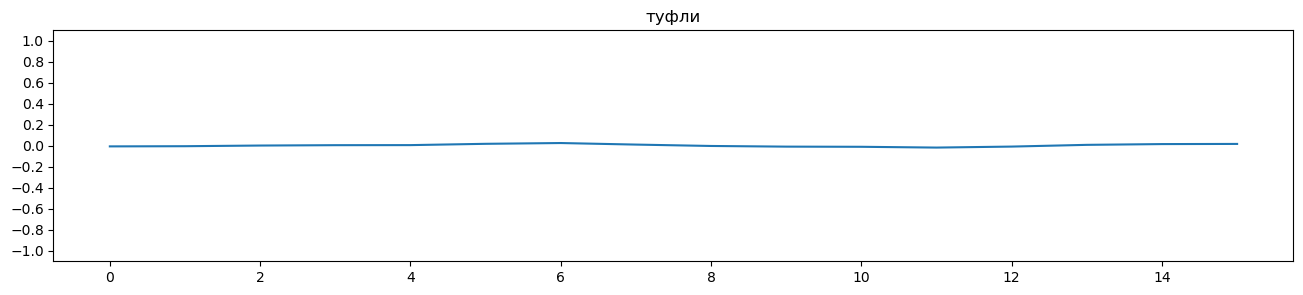

Label на
Audio shape: (2848,)
Waveform shape: (2848,)
Audio playback


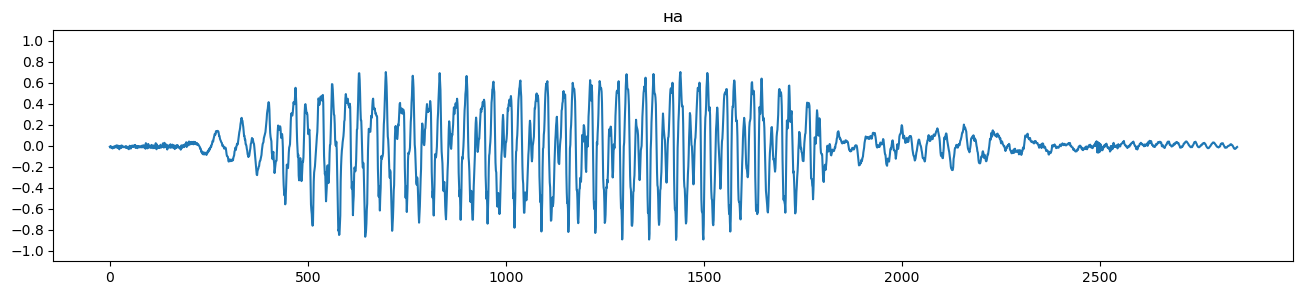

Label красивое
Audio shape: (16,)
Waveform shape: (16,)
Audio playback


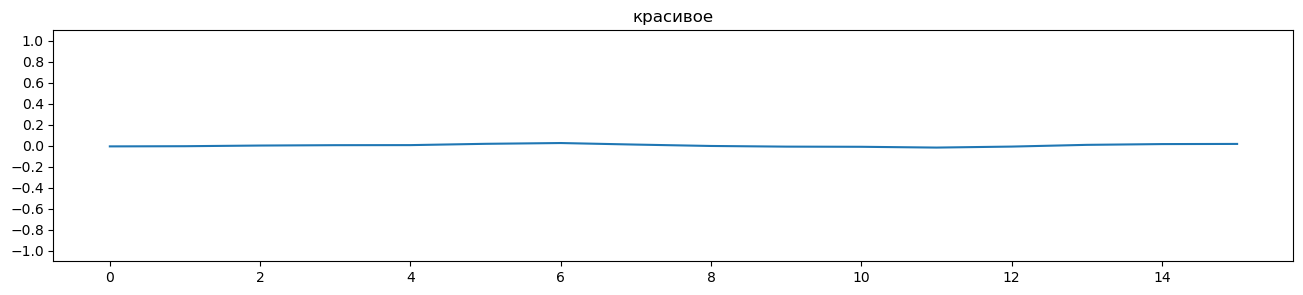

Label тебе
Audio shape: (16,)
Waveform shape: (16,)
Audio playback


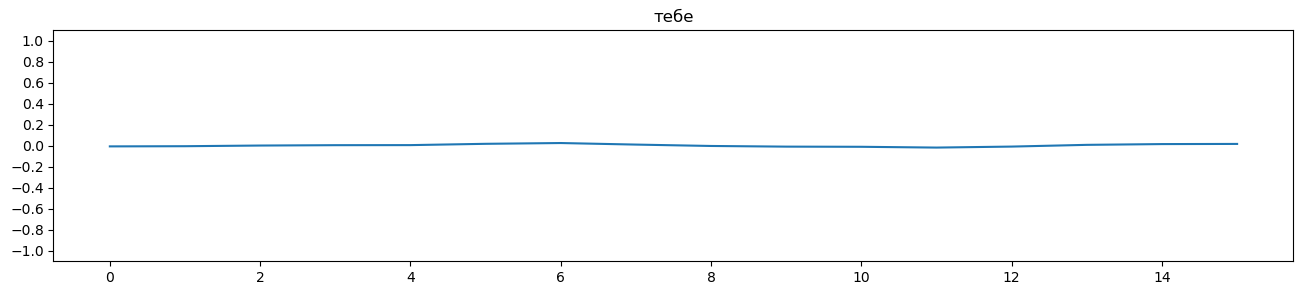

Label Поляков
Audio shape: (2848,)
Waveform shape: (2848,)
Audio playback


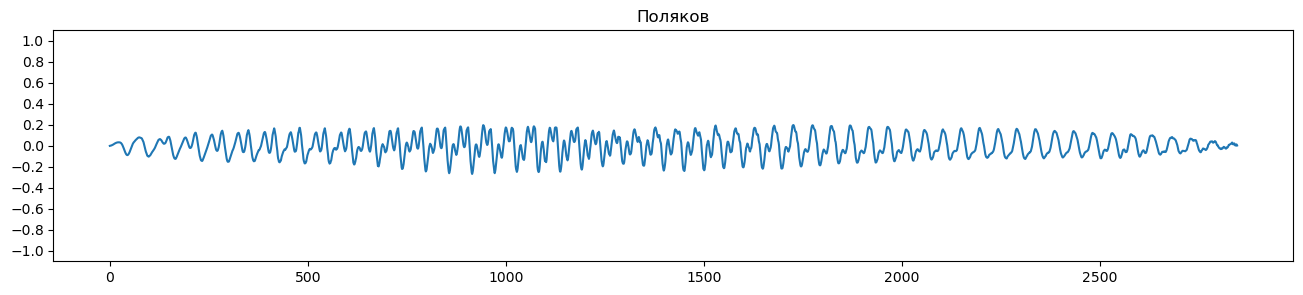

Label зр
Audio shape: (32,)
Waveform shape: (32,)
Audio playback


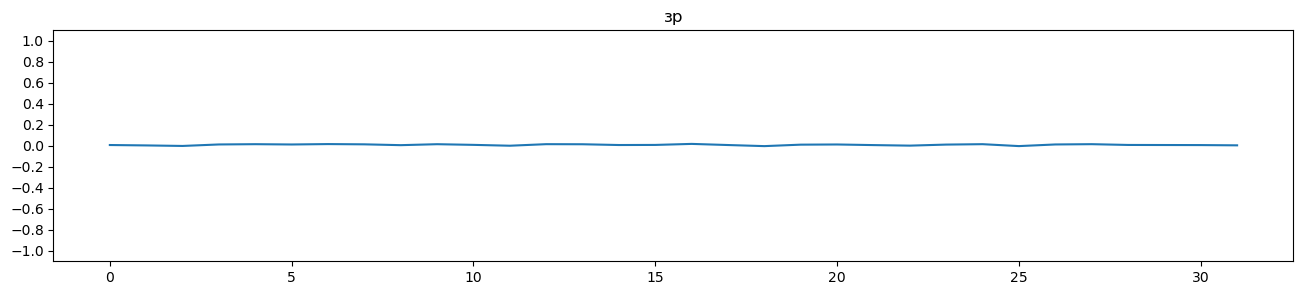

Label тряпкой
Audio shape: (32,)
Waveform shape: (32,)
Audio playback


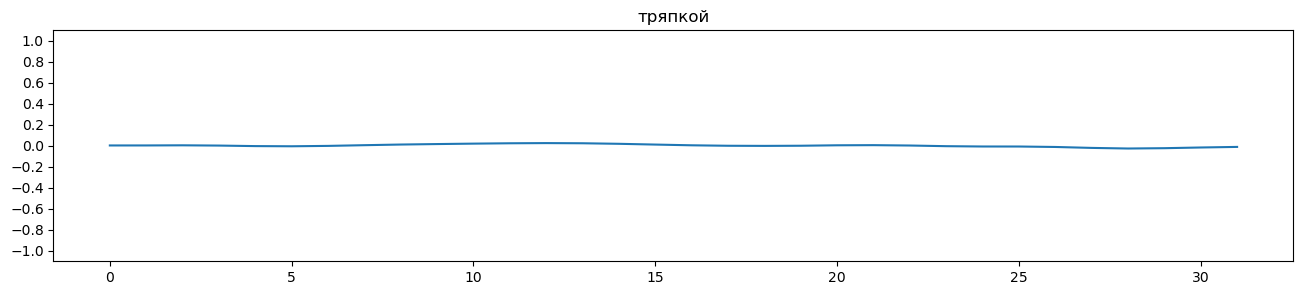

Label магазин
Audio shape: (16,)
Waveform shape: (16,)
Audio playback


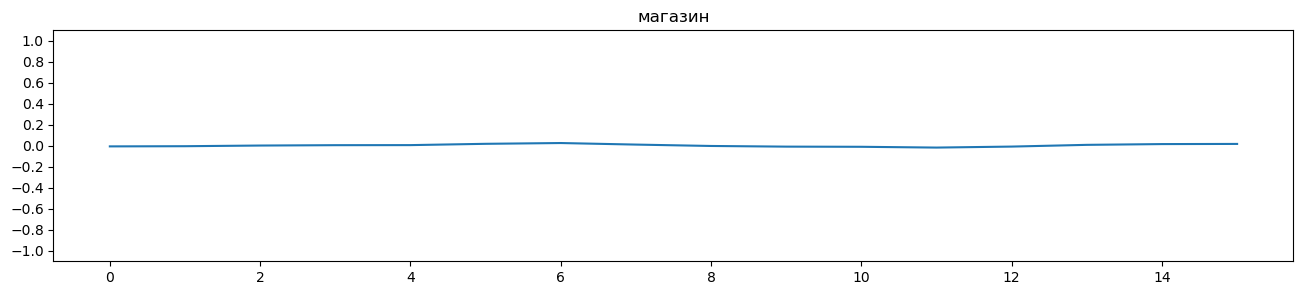

Label А
Audio shape: (3408,)
Waveform shape: (3408,)
Audio playback


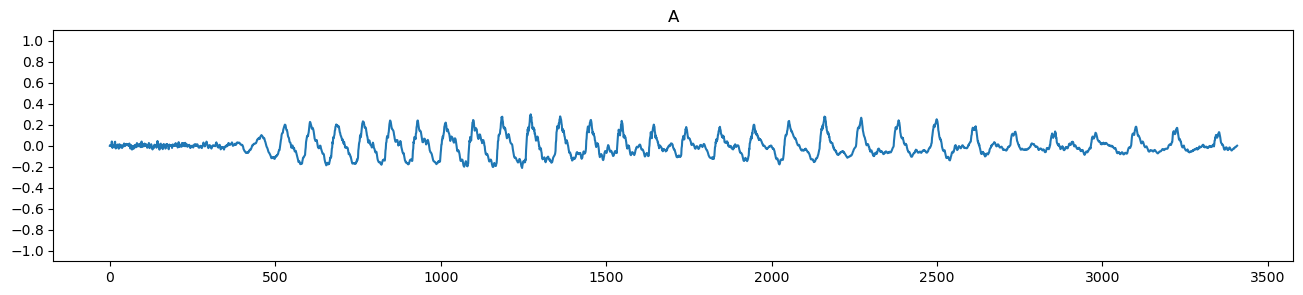

Label такси
Audio shape: (16,)
Waveform shape: (16,)
Audio playback


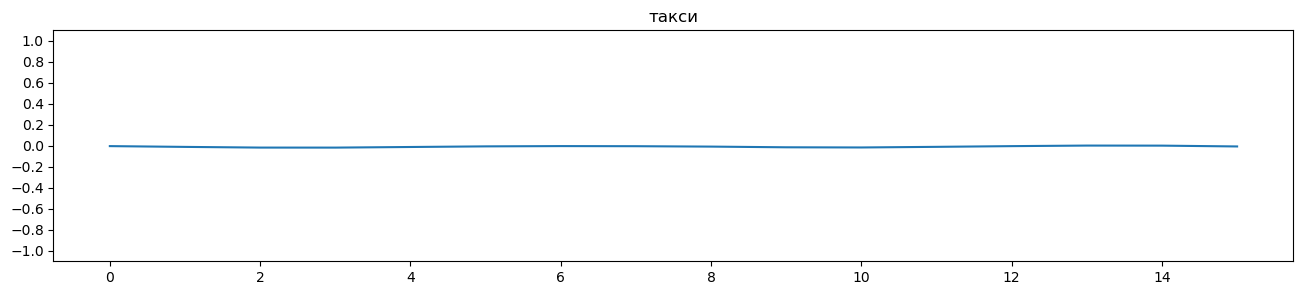

Label голова
Audio shape: (32,)
Waveform shape: (32,)
Audio playback


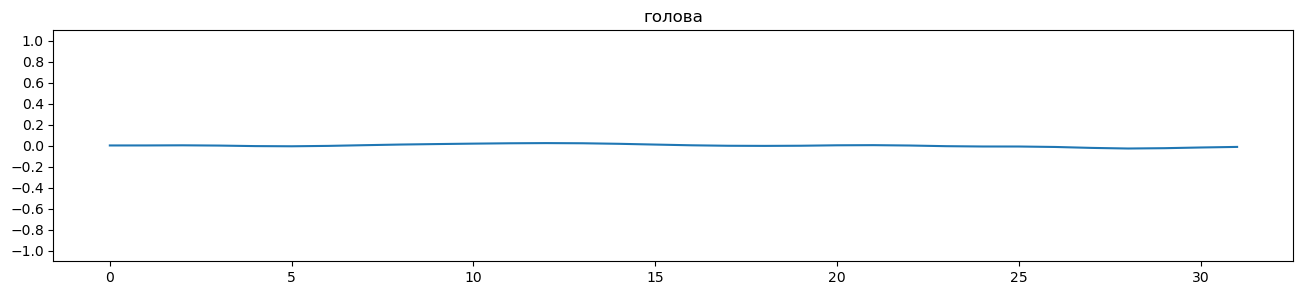

Label запах
Audio shape: (16,)
Waveform shape: (16,)
Audio playback


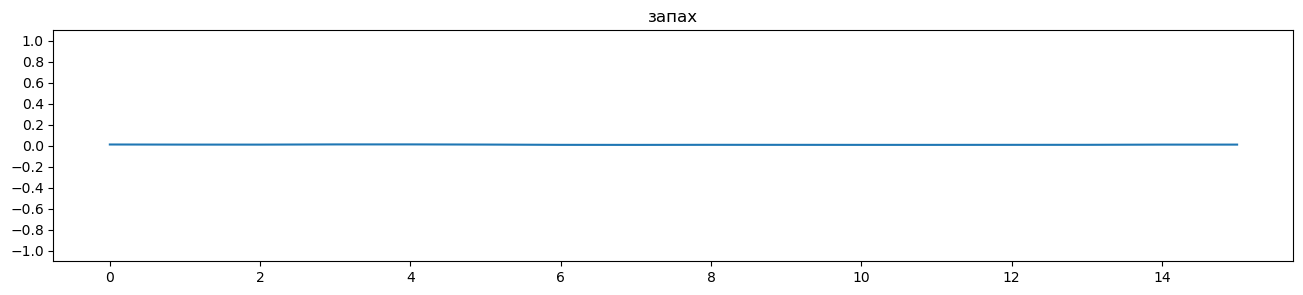

Label обмотана
Audio shape: (32,)
Waveform shape: (32,)
Audio playback


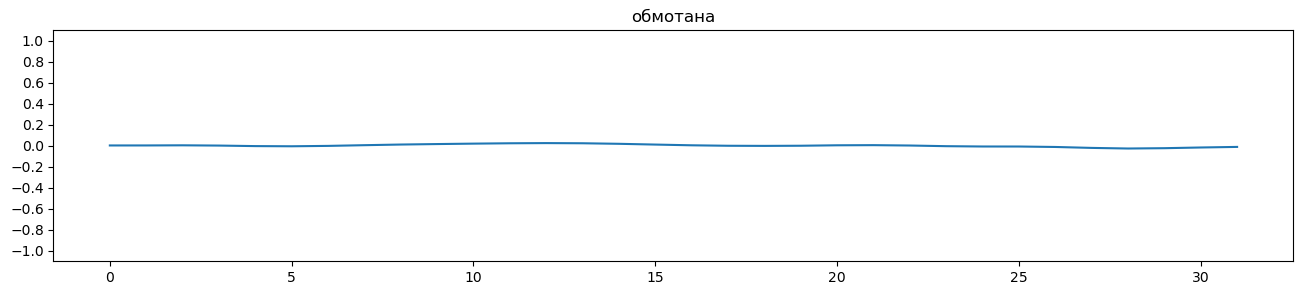

Label что
Audio shape: (96,)
Waveform shape: (96,)
Audio playback


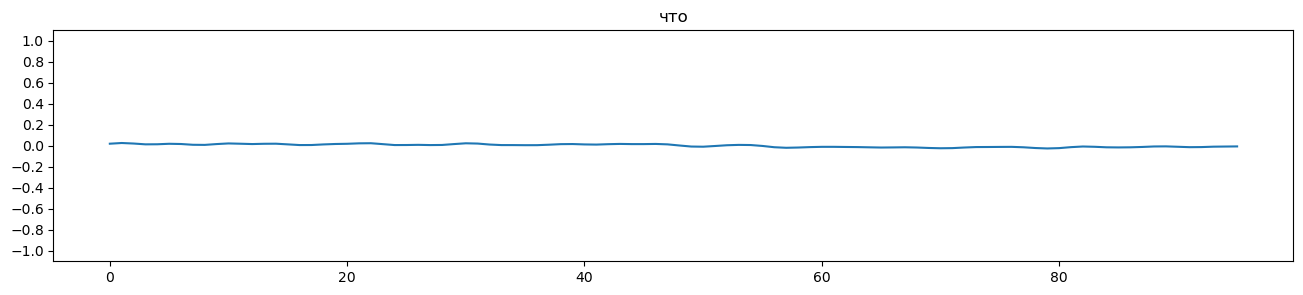

Label зовут
Audio shape: (3408,)
Waveform shape: (3408,)
Audio playback


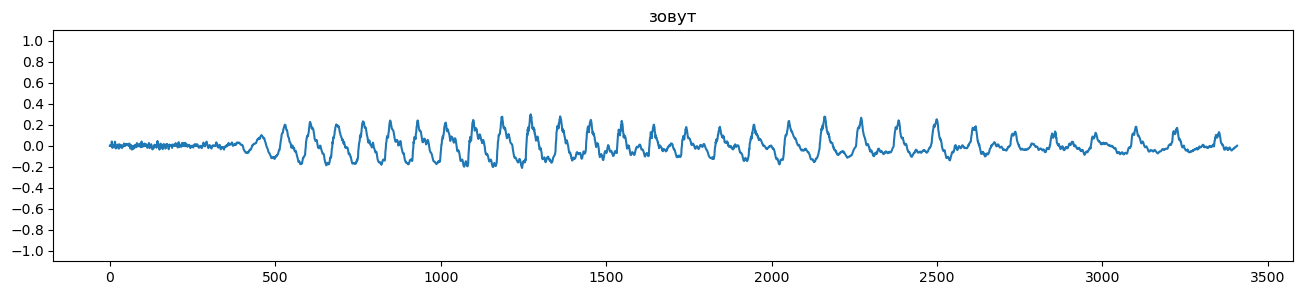

Label а
Audio shape: (2848,)
Waveform shape: (2848,)
Audio playback


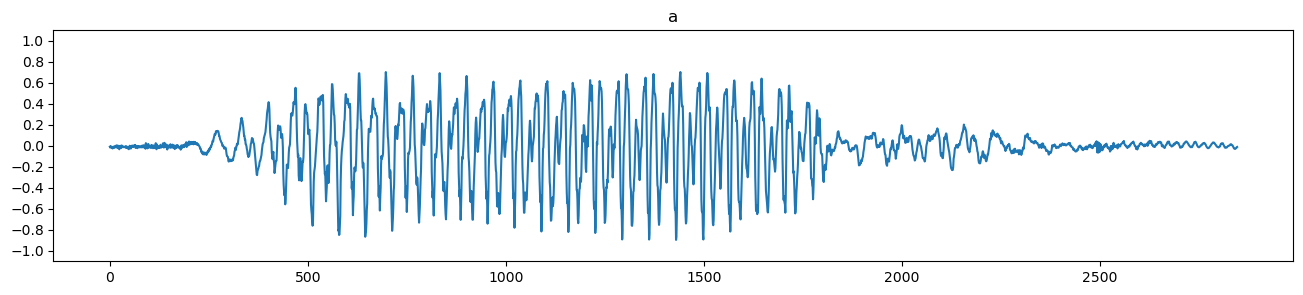

Label моря
Audio shape: (32,)
Waveform shape: (32,)
Audio playback


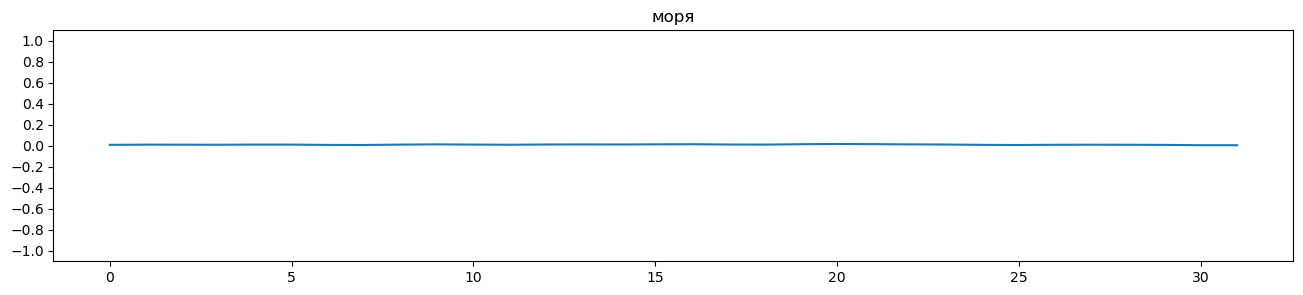

Label Оля
Audio shape: (3408,)
Waveform shape: (3408,)
Audio playback


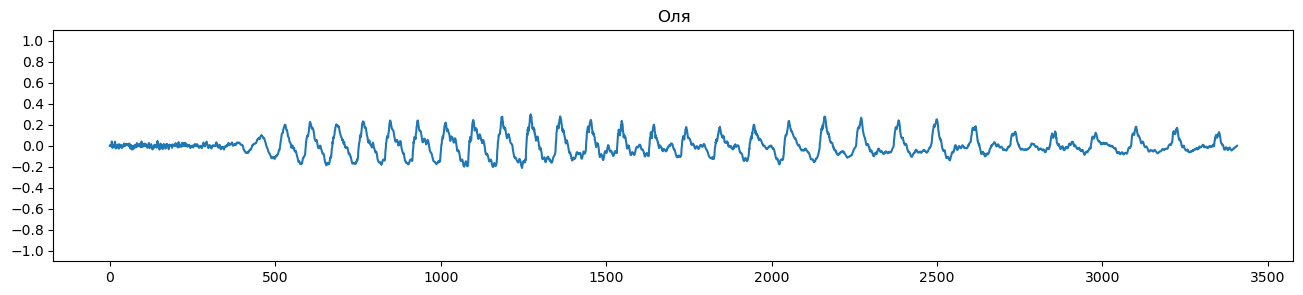

Label лю
Audio shape: (16,)
Waveform shape: (16,)
Audio playback


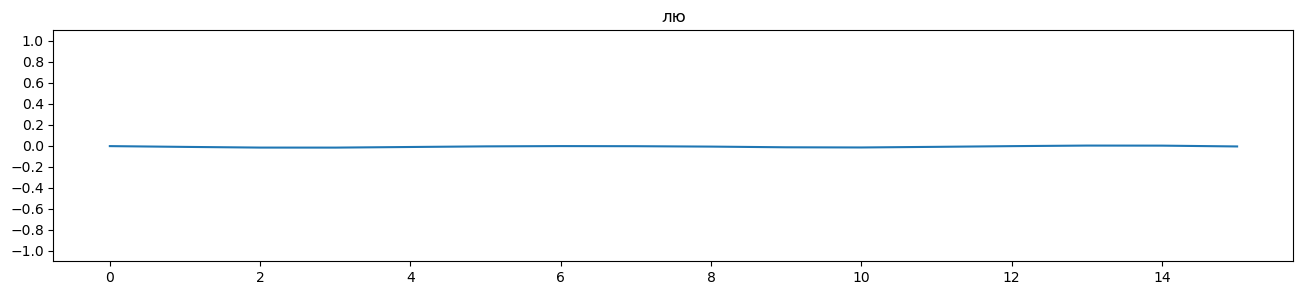

Label меня
Audio shape: (3408,)
Waveform shape: (3408,)
Audio playback


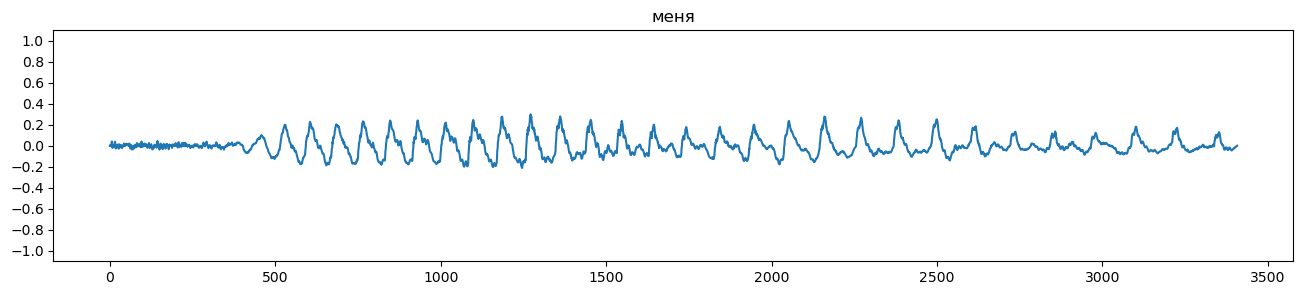

Label погоды
Audio shape: (32,)
Waveform shape: (32,)
Audio playback


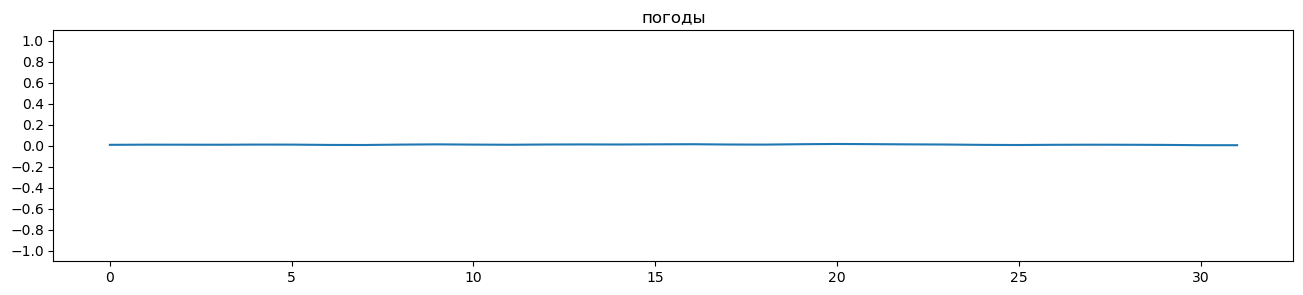

Label за
Audio shape: (16,)
Waveform shape: (16,)
Audio playback


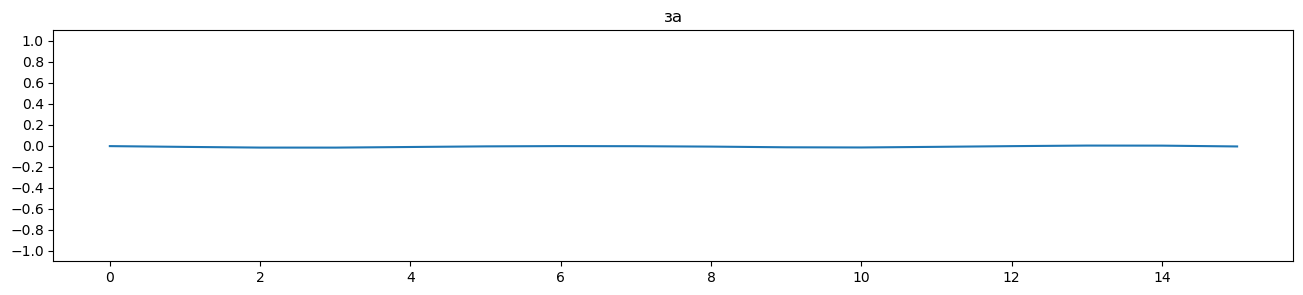

Label ждали
Audio shape: (32,)
Waveform shape: (32,)
Audio playback


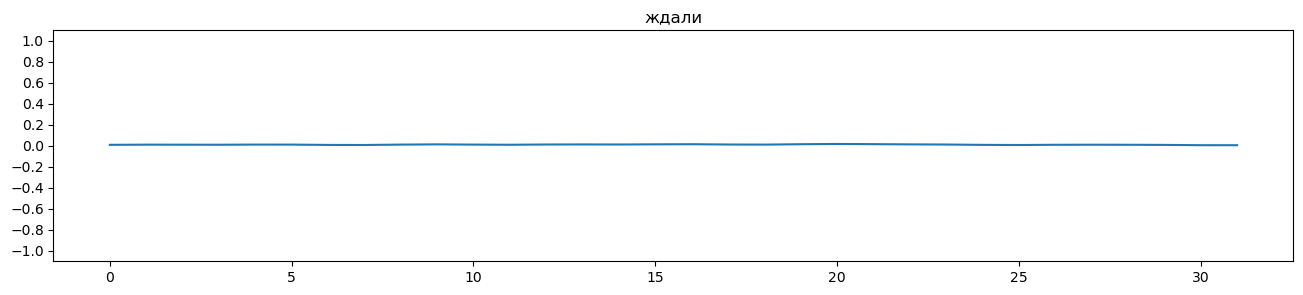

Label простой
Audio shape: (0,)
Waveform shape: (0,)
Audio playback


ValueError: zero-size array to reduction operation maximum which has no identity

In [13]:
data_dir = '/home/redalexdad/recognition_speech/voice_split'

# label_names = []
file_counter = 0  # Переменная для отслеживания количества обработанных файлов

# Рекурсивно обходим все файлы и подкаталоги в корневом каталоге
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Проверяем, что файл - звуковой файл
        if file.endswith(".wav"):
            # Увеличиваем счетчик обработанных файлов
            file_counter += 1

            # Проверяем, не превысило ли количество файлов 10
            if file_counter > 30:
                break

            # Остальной код вашего скрипта остается без изменений
            audio_file_path = os.path.join(root, file)
            label = os.path.basename(root)
            text_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}.txt")

            if not os.path.exists(text_file_path):
                print(f"No text file found for {audio_file_path}")
                continue

            # Далее ваш код для чтения текста и вывода информации о звуке
            print(f"Label {label}")
            waveform, sample_rate = librosa.load(audio_file_path, sr=None)

            print("Audio shape:", waveform.shape)
            print('Waveform shape:', waveform.shape)
            # display(waveform)
            print('Audio playback')
            display.display(display.Audio(waveform, rate=sample_rate))

            plt.figure(figsize=(16, 3))
            plt.plot(waveform)
            plt.title(label)
            plt.yticks(np.arange(-1.2, 1.2, 0.2))
            plt.ylim([-1.1, 1.1])
            # Отображаем график после обработки
            plt.show()